### EEC227C HW1 Q1, Yigit Efe Erginbas

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
A = np.zeros((5,10,10))
b = np.zeros((5,10))

In [40]:
for k in range(5):
    for i in range(10):
        for j in range(10):
            if i < j:
                A[k,i,j] = np.exp((i+1) / (j+1)) * np.cos((i+1) * (j+1)) * np.sin(k+1)
            if i > j:
                A[k,i,j] = np.exp((j+1) / (i+1)) * np.cos((j+1) * (i+1)) * np.sin(k+1)

for k in range(5):
    for i in range(10):
        A[k,i,i] = (i+1)/10 * np.abs(np.sin(k+1)) + np.sum(np.abs(A[k, i, :]))
        
for k in range(5):
    for i in range(10):        
        b[k, i] = np.exp((i+1) / (k+1)) * np.sin((i+1) * (k+1))

In [41]:
def f_eval(x):
    
    f_k = np.zeros(5)
    
    for k in range(5):
        f_k[k] = x.T @ A[k] @ x - x.T @ b[k]
    
    return np.max(f_k), np.argmax(f_k)

def f_grad(x):
    _, k_star = f_eval(x)
    return 2 * A[k_star] @ x - b[k_star]

Evaluate $f(x^{1})$:

In [42]:
f_eval(np.ones(10))

(5337.066429311364, 0)

Check if all $A_k$ are PSD:

In [43]:
for k in range(5):
    print(np.min(np.linalg.eig(A[k])[0]) > 0)

True
True
True
True
True


## Solve with CVXOPT to obtain the optimal point & value

In [50]:
import cvxpy as cp

x = cp.Variable(10)

Fi = []
for k in range(5):
    Fi.append(cp.quad_form(x, A[k]) - x.T @ b[k])

objective = cp.Minimize(cp.maximum(*Fi))
prob = cp.Problem(objective)
result = prob.solve()

x_opt = np.array(x.value)
optimal_value, _ = f_eval(x_opt)

print('Optimal Value = ', optimal_value)

-0.8414083342169736


## Subgradient Descent Algorithm

In [55]:
x = np.ones(10)
T = int(1e6)
C = 1e-3
hist = np.zeros(T)
best_value = np.inf

for t in range(T):
    eta = C/np.sqrt(t+1)
    current_value, _ = f_eval(x)
    if current_value < best_value:
        best_value = current_value
    hist[t] = best_value
    x = x - eta * f_grad(x)

In [56]:
print('Best Value = ', best_value)

Optimal Value =  -0.8414083342169736


## Subgradient Descent Algorithm with Polyak Stepsize

In [57]:
x = np.ones(10)
T = int(1e6)
hist_2 = np.zeros(T)
best_value = np.inf

for t in range(T):
    current_value, _ = f_eval(x)
    if current_value < best_value:
        best_value = current_value
    hist_2[t] = best_value
    
    eta = (current_value - optimal_value) / np.linalg.norm(f_grad(x))**2
    x = x - eta * f_grad(x)

In [59]:
print('Best Value = ', best_value)

Best Value =  -0.8414015595565663


## Results

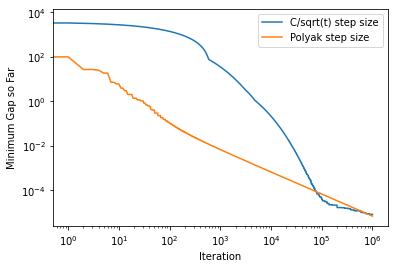

In [67]:
plt.plot(hist - optimal_value, label="C/sqrt(t) step size")
plt.xscale('log')
plt.yscale('log')

plt.plot(hist_2 - optimal_value, label="Polyak step size")
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Minimum Gap so Far')
plt.xlabel('Iteration')
plt.legend()
plt.show()